# 🧗‍♂️ **IFSC Rock Climbing Performance Analysis**

### Milestone 1: Exploratory Data Analysis (EDA)

**Author:** Derrick DeBuhr  
**Dataset:** IFSC Competition Results 1990–2019 (Kaggle)  
**Goal:** Explore international climbing competition data to understand performance trends, relationships between climber attributes and results, and prepare for predictive modeling.

## 📘 Project Overview

This notebook is the first milestone in a machine learning project exploring performance in international sport climbing competitions, using data from the **International Federation of Sport Climbing (IFSC)** spanning 1990–2019.

The dataset includes multiple Excel sheets containing:
- Competition results (for men, women, youth, and adults)
- Climber profiles (age, height, weight, nationality)
- Team and ranking information

**Objectives of this milestone:**
1. Load and inspect the IFSC dataset.
2. Perform basic exploratory data analysis (EDA).
3. Visualize key patterns in performance.
4. Prepare for later modeling stages (predicting performance outcomes).

This project aligns with my personal interest in rock climbing — the goal is to uncover what measurable factors contribute to performance across disciplines and time.


## ⚙️ 1. Setup

In this section, we import Python libraries for data manipulation, visualization, and analysis.  
We also configure general display settings to make the data easier to explore.


In [ ]:
#Import core libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

## 📂 2. Load the IFSC Dataset

The IFSC dataset is stored as a multi-sheet Excel file.  
We read it into Python using **pandas**, which allows us to explore each sheet (e.g., adult men’s results, climber profiles, rankings).

We'll start by inspecting the available sheets to get a sense of the structure and content.


In [ ]:
data_dir = "/root/.cache/kagglehub/datasets/anthonygiorgio/ifsc-climbing-competition-results-1991-2019/versions/2"
excel_path = os.path.join(data_dir, "IFSC Competiton Results 1990-2019 Dataset.xlsx")

data = pd.read_excel(excel_path, sheet_name=None)

print("Sheets loaded:", list(data.keys()))

#Load into directory
excel_path = list(data.keys())[0]

#Display sheet names & shapes
for sheet, df in data.items():
    print(f"{sheet}: {df.shape}")


Sheets loaded: ['Index', 'AllCompetitions', '1.Results.AllWorldChampionships', '2.Climbers', '3.Team Ranking', '4.Age Index', '5.Dependency Factor', 'RESULTS', '6.Results Only MEN', '6.1. Adult M', '6.2.Youth M', '7. Results Only WOMEN', '7.1.Adult W', '7.2.Youth W', 'LINK', 'DRAFT']
Index: (25, 7)
AllCompetitions: (102249, 6)
1.Results.AllWorldChampionships: (9514, 9)
2.Climbers: (12824, 10)
3.Team Ranking: (116, 106)
4.Age Index: (56, 27)
5.Dependency Factor: (9604, 68)
RESULTS: (247, 109)
6.Results Only MEN: (5565, 8)
6.1. Adult M: (1469, 9)
6.2.Youth M: (4090, 8)
7. Results Only WOMEN: (3959, 8)
7.1.Adult W: (920, 9)
7.2.Youth W: (3036, 8)
LINK: (92, 12809)
DRAFT: (1702, 58)


## 🔍 3. Inspecting the "Adult Men" Results

For initial exploration, we focus on the **Adult Men (6.1. Adult M)** results table.  
This sheet includes information such as:
- Year  
- Competition name  
- Discipline (Lead, Bouldering, or Speed)  
- Climber name  
- Age at the time of competition  
- Score achieved  

We’ll check column types, missing values, and some basic statistics to understand the dataset’s scale and quality.


In [ ]:
df_men = data['6.1. Adult M']
print("\nAdult M Results sample:\n", df_men.head())

print("\nColumn info:")
print(df_men.info())


Adult M Results sample:
    year                               competition    category nation  \
0  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUS   
1  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUS   
2  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUS   
3  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUT   
4  1991  UIAA World Championship - Frankfurt 1991  M E N lead    AUT   

   climber ID lastname firstname  score age (at time of competition)  
0         322  Weigand     Geoff    0.0                               
1         347   Verick      Hira    0.0                           18  
2         546    Baker      Mark    0.0                           28  
3         811    Fürst    Stefan   26.0                           22  
4         344   Rieser    Hannes    1.0                           26  

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 9 colum

## 📊 4. Descriptive Statistics

Here we summarize key numeric features using `.describe()` to compute mean, standard deviation, min, max, and quartiles.  
This helps identify value ranges, possible outliers, and general trends in scores and ages.


In [ ]:
print("\nDescriptive statistics for numeric columns:")
print(df_men.describe().T)


Descriptive statistics for numeric columns:
             count         mean          std     min     25%     50%     75%  \
year        1469.0  2006.668482     8.528185  1991.0  1999.0  2007.0  2014.0   
climber ID  1469.0  6269.912185  9058.970213     1.0   696.0  5703.0  8767.0   
score       1469.0     8.859769    18.790200     0.0     0.0     0.0     8.0   

                max  
year         2019.0  
climber ID  79046.0  
score         100.0  


## 📈 5. Visualizing Performance Trends

We now create a few simple but meaningful visualizations to illustrate performance patterns in the data.

- **Boxplot of scores by age:** highlights how performance differs across ages.  
- **Line plot of average score by year:** shows how average competition performance has changed over time.

These plots provide an initial sense of variability and long-term trends, forming the foundation for deeper feature analysis.


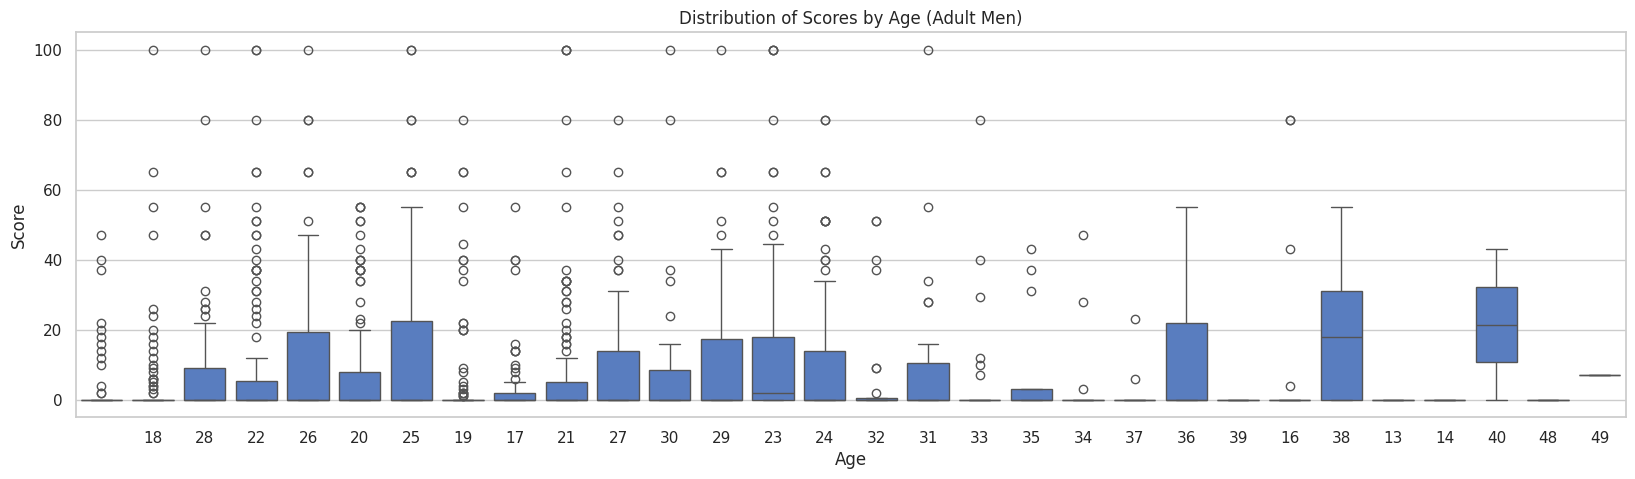

In [ ]:
# Example 1: Distribution of scores by discipline/category
plt.figure(figsize=(20,5))
sns.boxplot(data=df_men, x='age (at time of competition)', y='score')
plt.title('Distribution of Scores by Age (Adult Men)')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

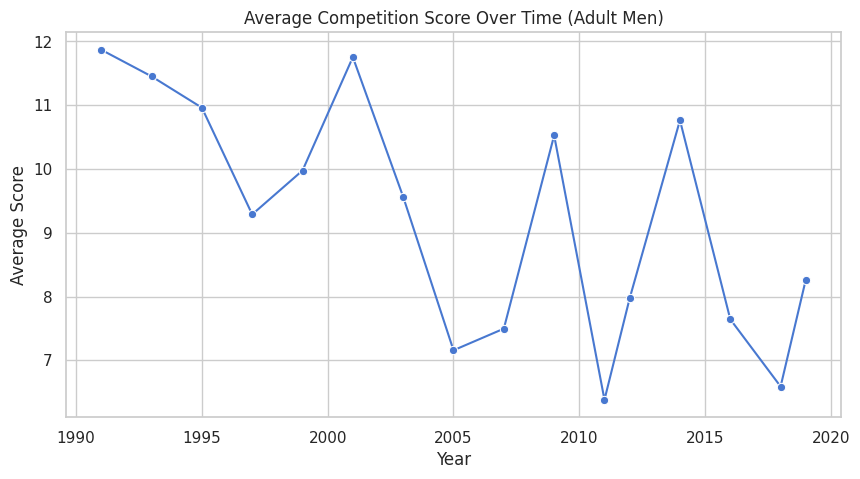

In [ ]:
# Example 2: Performance over time (average score per year)
avg_score_per_year = df_men.groupby('year')['score'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_score_per_year, x='year', y='score', marker='o')
plt.title('Average Competition Score Over Time (Adult Men)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()